<a href="https://colab.research.google.com/github/EmmaCOo/Individual-Project-1-Prediction-of-Loan-Approval/blob/main/Project_1_Loan_Approval_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT_1 
## LOAN DATA SET
## EMMA_OO
## 06/30/2022 - 07/09/2022

In [1]:
### import libraries

import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import OrdinalEncoder, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import io
import warnings
warnings.filterwarnings("ignore")

In [2]:
##IMPORT DATA SET

from google.colab import files
uploaded = files.upload()

Saving loan_data_set.csv to loan_data_set.csv


In [56]:
df = pd.read_csv(io.BytesIO(uploaded['loan_data_set.csv']))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EXPLORING THE DATA SET

In [4]:
# check the data shape
df.shape

(614, 13)

In [5]:
# check overall view of the whole data set
df.info()

# Categorical features are ['Gender','Married','Education','Self_Employed','Property_Area']
# Numerical features are ['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
# 'Credit_History']

# Note missing values were observed in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, 
# Credit_History 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Drop the unnecessay column Loan_ID
df = df.drop('Loan_ID', axis = 1)  # axis = 1 represent COLUMN
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
# Statistic of Data set
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# DATA VISUALIZATIONS

## NUMERICAL FEATURES

In [8]:
# Let's save numerical, categorical, and binary features for easier access.

num_features = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

cat_features = df[['Gender','Married','Education', 'Self_Employed','Property_Area']]

bi_features  = df[['Dependents','Credit_History']]

### BOX PLOT

Text(0.5, 1.0, 'BoxPlot')

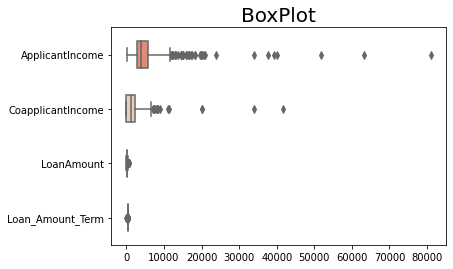

In [9]:
# Boxplot

import seaborn as sns
from matplotlib import figure

f = figure.Figure( figsize =(15,28) )
boxplot = sns.boxplot(data=num_features, palette = "coolwarm_r", width=0.5, orient='h', whis=2)
boxplot.axes.set_title("BoxPlot", fontsize=20, color='Black')


#### Outliers were observed in ApplicantIncome and CoapplicantIncome. 
#### Outliers will be replaced with mean values after data splitting. 


### HISTOGRAMS

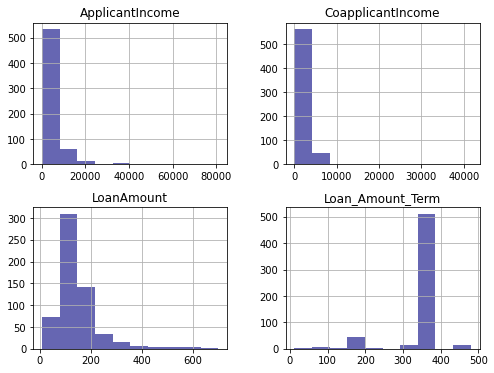

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,6))
ax = fig.gca()
num_features.hist(ax = ax, color = 'navy', alpha = 0.6)
plt.show()


#### All are left-skewed except Loan_Amount_Term (right-skewed)
#### Standardization will be performed after data splitting to balance the skewness. 

### CATEGORICAL FEATURES

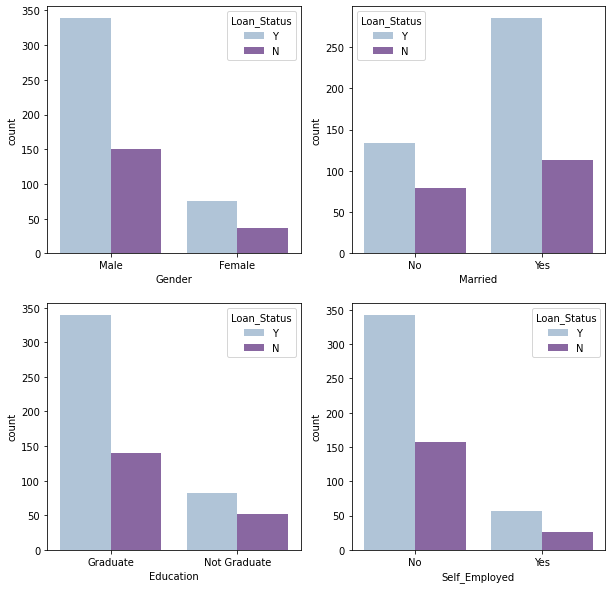

In [11]:
fig , ax = plt.subplots(2,2,figsize = (10,10))
for i , subplots in zip (cat_features, ax.flatten()):
  sns.countplot(cat_features[i],hue = df['Loan_Status'],ax = subplots, palette = 'BuPu')
plt.show()

### Interpretation
##### Gender
There were more male applied for the loan than the female.  Among the male, more than 50% got approved for the loan.  For the female, more than around 50% got approved as well. 

#### Married
Most applicants are married. More than 50% of married couples were approved for the loan.  For the unmarried people, the loan rejection is a bit higher than the married people.  (It makes sense considering the combined income of the married couples calls for the higher chance of loan approval). 

#### Education 
Education results is very similar to the Gender results.

#### Self_Employed
Self_Employed results is very similar to Gender and Education.


### BINARY FEATURES

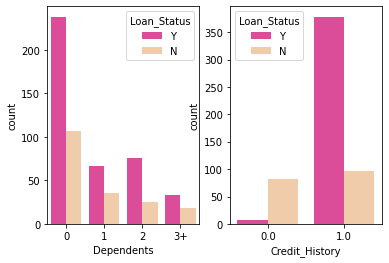

In [12]:
fig , ax = plt.subplots(1,2,figsize = (6,4))
for i , subplots in zip (bi_features, ax.flatten()):
  sns.countplot(bi_features[i],hue = df['Loan_Status'],ax = subplots, palette = 'Accent_r', alpha = 0.8)
plt.show()

### Interpretation
#### Dependents:
Most applicants don't have any dependents and more than 50% got approved for the loan.  

#### Credit_History
Majoity of applicants have credit history.  Most with credit history are approved.  Only a small portion of those wihout credit history got approved. 

### CORRELATION

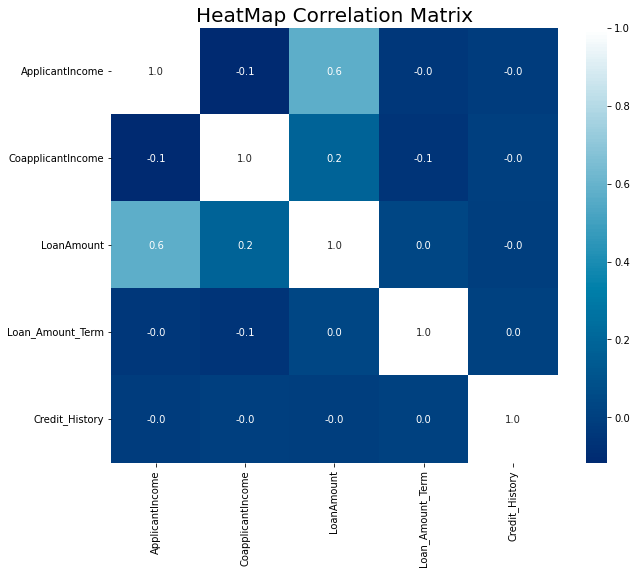

In [13]:
# Add figure title and size
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.title('HeatMap Correlation Matrix', size = 20, color = 'Black')

# Correlation
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".1f", cmap="ocean", center=0, ax=ax)

####  Moderate strong correlation between the Loan Amount and the Applicant Income.  Since there's not a lot of features for the data set, there's no need to getting rid of one of the features. 

# DATA PARTITIONING

#### Before pre-processing of the data set, let's split into the train and test data set to prevent the data leakage. 

#### Train and test data will be treated exactly for the data-preprocessing, feature-engineering, and feature-reduction,etc

In [14]:
# Data Splitting

#splitting train (70%) and test (30%)

train,test = train_test_split(df, train_size = 0.7, random_state =1)
print ('Training:', train.shape)
print ('Test:', test.shape)

train.head()

Training: (429, 12)
Test: (185, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
133,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
400,Male,Yes,2,Not Graduate,No,2889,0.0,45.0,180.0,0.0,Urban,N
486,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural,N
161,Male,Yes,0,Graduate,No,7933,0.0,275.0,360.0,1.0,Urban,N


In [15]:
# Check Missing Values
train.isna().sum()

Gender                8
Married               2
Dependents            9
Education             0
Self_Employed        19
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       37
Property_Area         0
Loan_Status           0
dtype: int64

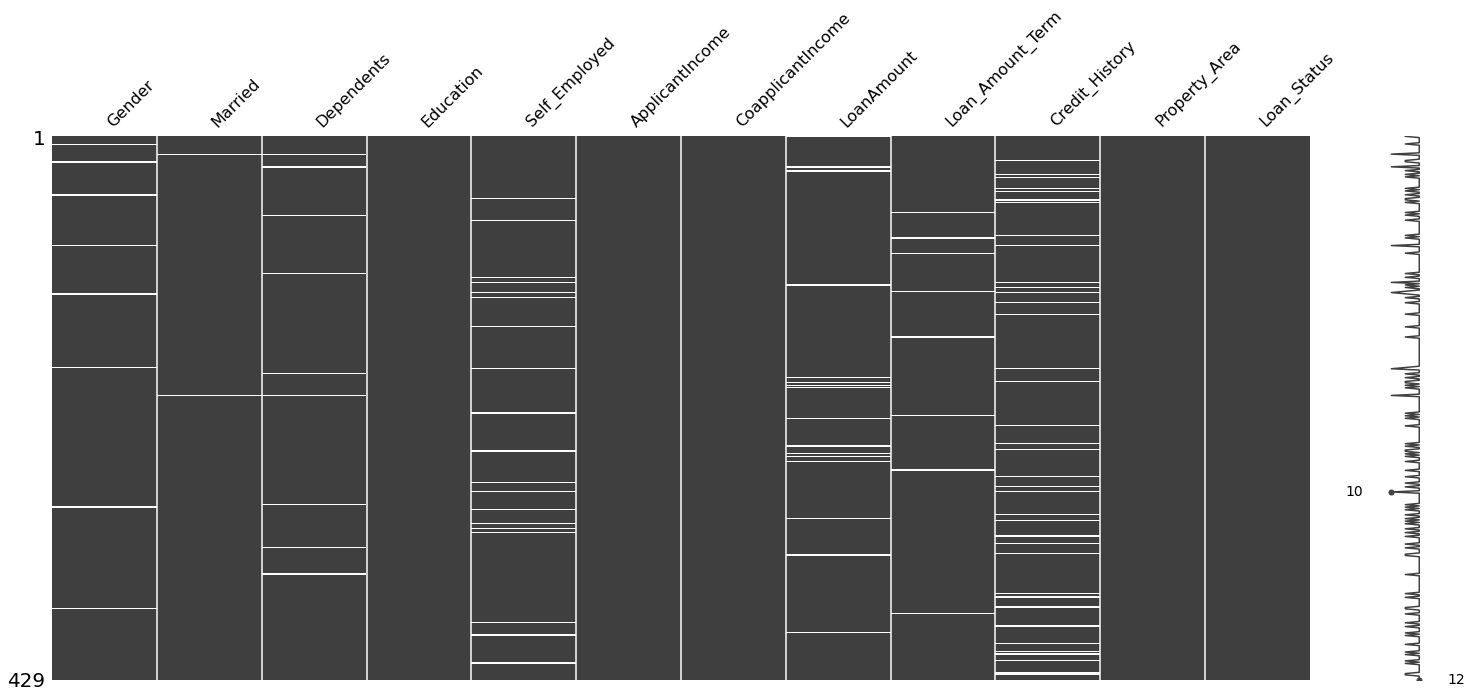

In [16]:
# Check if missing values are Missing At Random (MAR)
import missingno as msno
msno.matrix(train)

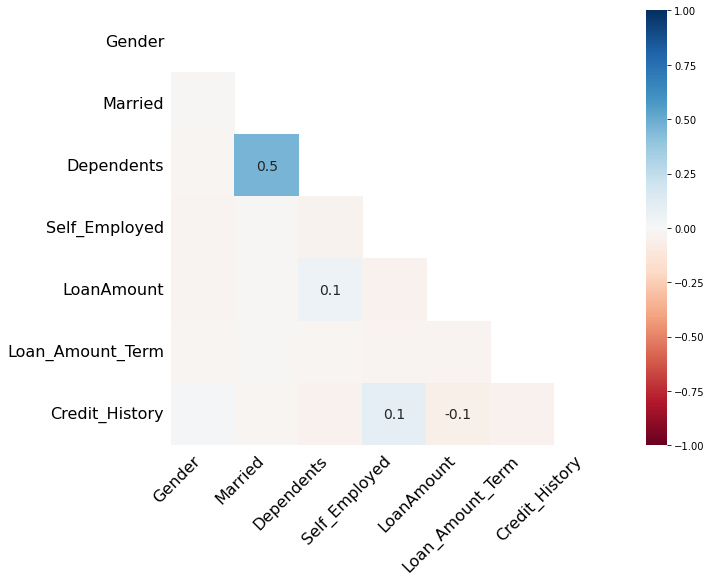

In [17]:
# Checking missing values relatedness with correlation plot
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
msno.heatmap(train, ax=ax)

#### According to these plots, it's noted that two records of missing values from Married and Dependents seem related (NMAR) since the heatmap showed relateness of 0.5 and the three lines were connected in the matrix plot. 

#### Since it's only two records that shows NMAR, it will be replaced with the mode values.  

# MISSING VALUES IMPPUTATION


1) The missing values from the numerical features such as LoanAmount, Loan_Amount_Term will be replaced with mean values.

2) The missing values from categorical features such as Gender, Married,Self_Employed, and Credit_History(1 or 0) will be replaced with the mode. Dependends will also be replacd by mode value. 



In [18]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
133,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
400,Male,Yes,2,Not Graduate,No,2889,0.0,45.0,180.0,0.0,Urban,N
486,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural,N
161,Male,Yes,0,Graduate,No,7933,0.0,275.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
129,Male,Yes,0,Graduate,No,6080,2569.0,182.0,360.0,NaN,Rural,N
144,Male,Yes,2,Graduate,No,11757,0.0,187.0,180.0,1.0,Urban,Y
72,Male,No,0,Graduate,No,3500,0.0,81.0,300.0,1.0,Semiurban,Y
235,Male,Yes,1,Graduate,No,5500,1260.0,170.0,360.0,1.0,Rural,Y


In [19]:
# The missing values from the numerical features such as LoanAmount, Loan_Amount_Term will be 
# replaced with mean values.

# Train data set
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace = True)

# Test data set
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(), inplace = True)


In [20]:
#The missing values from Gender, Self_Employed, and Credit_History(1 or 0),Dependents will be replaced with the mode. 

# Train data set
for column in ['Gender', 'Married', 'Self_Employed','Credit_History','Dependents']:
    train[column].fillna(train[column].mode()[0], inplace = True)
    
# Test data set
for column in ['Gender','Married','Self_Employed','Credit_History','Dependents']:
    test[column].fillna(test[column].mode()[0], inplace = True)

In [21]:

# check missing value imputation 
print(train.isna().sum())
print(test.isna().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# ENCODING OF CATEGORICAL FEATURES

### Let's perform feature engineering for the train and test data set. 

#### LabelEncoding for Categorical Features

In [22]:
le = preprocessing.LabelEncoder()

# train daa 
train = train.apply(le.fit_transform)

# test data
test = test.apply(le.fit_transform)

train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
81,1,1,1,0,1,54,0,90,8,1,1,1
133,1,1,0,0,1,148,0,2,3,1,1,1
400,1,1,2,1,0,90,0,8,4,0,2,0
486,1,0,2,0,0,156,0,28,8,0,0,0
161,1,1,0,0,0,318,0,146,8,1,2,0


Since encoded categorical features and numerical features have different scales, it's necessary to scale them equally. 

We will split the encoded categorical features and numerical features into two different data frames. Numerical features will be scaled down so that categorical features won't be affected by scaling. After that, we will merge these two data frames. 

#### Scaling for Numerical Features

In [23]:
# Let's split numerical columns
num_train = train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

num_test = test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [24]:
cols = num_train.columns
scaler = preprocessing.Normalizer()

# for train 
num_train_scaled = scaler.fit_transform(num_train)
num_train_df = pd.DataFrame(num_train_scaled, index = num_train.index, columns = cols)  #index=num_train.index to keep the same index no

# for test
num_test_scaled = scaler.fit_transform(num_test)
num_test_df = pd.DataFrame(num_test_scaled, index = num_test.index, columns = cols)

In [25]:
# Let's split categorical columns
cat_train = train.drop(columns = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis = 1)

cat_test = test.drop(columns =  ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis = 1) 

In [26]:
# Join scaled numerical features and encoded categorical features
join_train = pd.concat([num_train_df, cat_train], axis = 1)

join_test = pd.concat([num_test_df, cat_test], axis = 1)

join_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
81,0.513008,0.0,0.855013,0.076001,1,1,1,0,1,1,1,1
133,0.999703,0.0,0.013510,0.020264,1,1,0,0,1,1,1,1
400,0.995098,0.0,0.088453,0.044227,1,1,2,1,0,0,2,0
486,0.983020,0.0,0.176439,0.050411,1,0,2,0,0,0,0,0
161,0.908557,0.0,0.417136,0.022857,1,1,0,0,0,1,2,0


In [27]:
# Split predictors and target column
train_X = join_train.drop(columns = ['Loan_Status'], axis = 1)
train_y = join_train[['Loan_Status']]

test_X = join_test.drop(columns = ['Loan_Status'], axis = 1)
test_y = join_test[['Loan_Status']]

MODELS

# K-NearestNeighbors (KNN)

### KNN BASE MODEL - WITHOUT ANY TUNING

In [28]:
# To compare results, we can create a base model without any hyperparameters.
knn_base = KNeighborsClassifier()
knn_base.fit(train_X,train_y)
knn_base_pred = knn_base.predict(test_X)

knn_base_accuracy = accuracy_score(test_y, knn_base_pred)
knn_base_accuracy


0.7135135135135136

### Find Optimal K Number

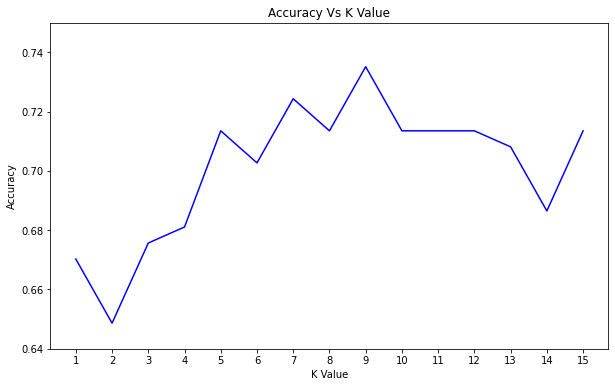

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# let's use loop and append function to find the respective accuray scores with k values

accuracy = []

for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(train_X, train_y)
  knn_pred = knn.predict(test_X)
  accuracy.append(accuracy_score(test_y, knn_pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,16), accuracy, color ='blue')
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.ylim(.64, .75)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))


### The highest accuracy is observed at the optimal k = 9. 

In [30]:

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(train_X, train_y)
knn_pred = knn.predict(test_X)

knn_accuracy = accuracy_score(test_y, knn_pred)
knn_accuracy

0.7351351351351352

In [31]:
# print confusion matrix

print('Confusion Matrix')
cm = confusion_matrix(test_y, knn_pred)
display(pd.DataFrame(cm))

# print classification report
knn_cf = classification_report(test_y, knn_pred)
print('Classification Report')
print(knn_cf)


Confusion Matrix


,0,1
0,15,46
1,3,121


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.25      0.38        61
           1       0.72      0.98      0.83       124

    accuracy                           0.74       185
   macro avg       0.78      0.61      0.61       185
weighted avg       0.76      0.74      0.68       185



### DECISION TREE MODEL

#### DECISION TREE - BASE MODEL WITHOUT ANY TUNING


In [32]:

### BASE MODEL WITHOUT ANY TUNING
dt_base = DecisionTreeClassifier()

dt_base.fit(train_X,train_y)

dt_base_pred = dt_base.predict(test_X)

base_dt_accuracy = accuracy_score(test_y, dt_base_pred)
base_dt_accuracy

0.7189189189189189

### Hyperparameter Tuning
Let's find the optimal max_depth hyperparameter for decision tree model


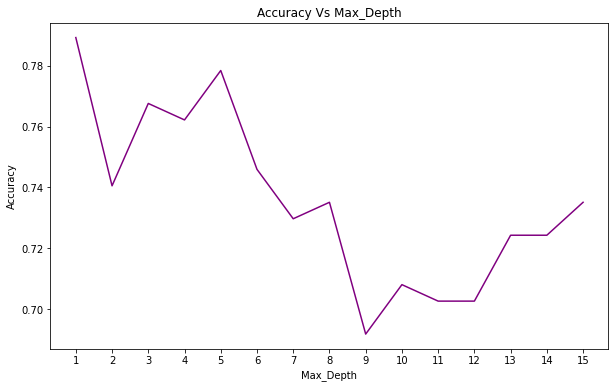

In [33]:
accuracy_dt =[]

for m in range(1,16):
  dt = DecisionTreeClassifier(max_depth=m, random_state=42)
  dt.fit(train_X,train_y)
  dt_pred = dt.predict(test_X)
  accuracy_dt.append(accuracy_score(test_y,dt_pred))


plt.figure(figsize=(10,6))
plt.plot(range(1,16), accuracy_dt, color ='Purple')
plt.title('Accuracy Vs Max_Depth')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))


In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 5, random_state = 42)

# train the model
dt_model = dt.fit(train_X, train_y)

#predict the model
dt_pred = dt_model.predict(test_X)

# model accuracy
dt_accuracy = accuracy_score(test_y, dt_pred)
print('Accuracy')
print(dt_accuracy)

# classification_report
dt_cf = classification_report(test_y, dt_pred)
print('Classification Report')
print(dt_cf)

Accuracy
0.7783783783783784
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        61
           1       0.79      0.92      0.85       124

    accuracy                           0.78       185
   macro avg       0.77      0.71      0.72       185
weighted avg       0.77      0.78      0.76       185



### RANDOM FOREST

#### RANDOM FOREST - BASE MODEL WITHOUT ANY TUNING





In [35]:
from sklearn.ensemble import RandomForestClassifier

#train the model
rf = RandomForestClassifier()
rf_model = rf.fit(train_X,train_y)

# predit the model
rf_pred = rf_model.predict(test_X)

#accuracy 
base_rf_accuracy = accuracy_score(test_y, rf_pred)
base_rf_accuracy

0.7675675675675676

#### HYPERPARAMETER TUNING

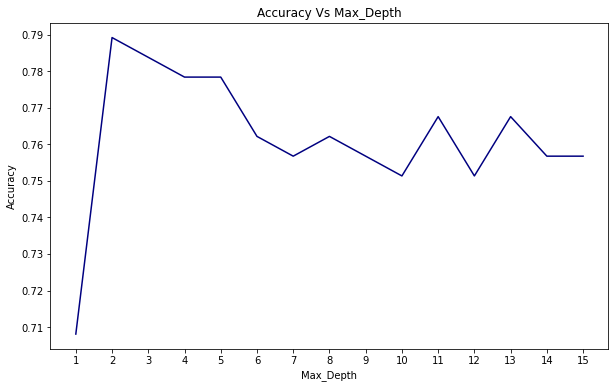

In [36]:
# let's find the optimal max_depth with highest accuracy

accuracy_rf = []

for r in range(1,16):
  rf = RandomForestClassifier(max_depth = r, random_state =42)
  rf.fit(train_X,train_y)
  rf_pred = rf.predict(test_X)
  accuracy_rf.append(accuracy_score(test_y, rf_pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,16), accuracy_rf, color ='Navy')
plt.title('Accuracy Vs Max_Depth')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))


In [37]:
# Hyperparameter tuning with max_depth = 2

#train the model
tuned_rf = RandomForestClassifier(max_depth=5, random_state=42)
tuned_rf_model = tuned_rf.fit(train_X,train_y)

# predit the model
tuned_rf_pred = tuned_rf_model.predict(test_X)

#accuracy 
rf_accuracy = accuracy_score(test_y, rf_pred)
print(rf_accuracy)

#classification report
rf_cf = classification_report(test_y, rf_pred)
print('Classification Report')
print(rf_cf)

0.7567567567567568
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.44      0.55        61
           1       0.77      0.91      0.83       124

    accuracy                           0.76       185
   macro avg       0.74      0.68      0.69       185
weighted avg       0.75      0.76      0.74       185



###**LOGISTIC REGRESSION MODEL**

In [44]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
lg = LogisticRegression()

# fit the model with data
lg_model = lg.fit(train_X, train_y)

#predict the model
lg_pred=lg_model.predict(test_X)

#accuracy 
lg_accuracy = accuracy_score(test_y, y_pred)
print(lg_accuracy)

#classification report
lg_cf = classification_report(test_y, lg_pred)
print('Classification Report')
print(lg_cf)

0.7891891891891892
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



###**LASSO REGRESSION MODEL**

In [50]:
lasso_lg = LogisticRegression(penalty='l1', solver='liblinear')
lasso = lasso_lg.fit(train_X, train_y)

lasso_pred = lasso.predict(test_X)

lasso_accuracy = accuracy_score(test_y, lasso_pred)

lasso_cf = classification_report(test_y, lasso_pred)
print(lasso_cf)

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



###**RIDGE REGRESSION MODEL**

In [51]:
ridge_lg = LogisticRegression(penalty = 'l2', solver = 'liblinear')

ridge = ridge_lg.fit(train_X, train_y)

ridge_pred = ridge.predict(test_X)

ridge_accuracy = accuracy_score(test_y, ridge_pred)

ridge_cf = classification_report(test_y, ridge_pred)
print(ridge_cf)

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



###**BASE MODELS' ACCURACY COMPARISON**

[0.7135135135135136, 0.7189189189189189, 0.7675675675675676, 0.7891891891891892]


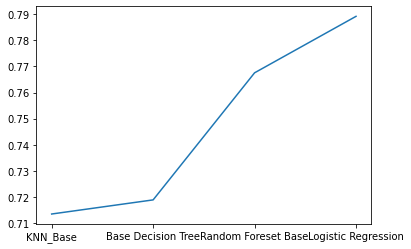

In [54]:
# Accurcy Comparison of Base Models
base_models = ['KNN_Base','Base Decision Tree','Random Foreset Base','Logistic Regression']
base_models_accuracy = [knn_base_accuracy, base_dt_accuracy, base_rf_accuracy, lg_accuracy]
print(base_models_accuracy)

plt.plot(base_models, base_models_accuracy)


For the base models, Logistic Regression model ranks the highest with 78.9%. 

###**TUNED MODELS' ACCURACY COMPARISON**

[0.7351351351351352, 0.7783783783783784, 0.7567567567567568, 0.7891891891891892, 0.7891891891891892]


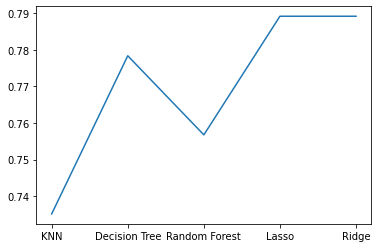

In [55]:
# Accuracy Comparision of Tuned Models
models = ['KNN','Decision Tree','Random Forest','Lasso', 'Ridge']
accuracy = [knn_accuracy, dt_accuracy, rf_accuracy, lasso_accuracy, ridge_accuracy]
print(accuracy)

plt.plot(models,accuracy)

For the tuned models, Lasso and Ridge perfomr the best with the accuracy of 78.9%. 

**Overall, Logistic Regresion, Lasso, Ridge can be used as the optimal model since they score the highest with ~80% accuracy.**